# Cultural Algorithm for Wordle Solver 

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
%load_ext manim
from manim import config
config.verbosity = "ERROR" 

The manim module is not an IPython extension.


In [37]:
with open("words.txt", "r") as f:
    words = [line.strip() for line in f]
print(f"Loaded {len(words)} words")

Loaded 14855 words


In [66]:
words = [
    "aback","abase","abate","abbey","abhor","abide","about","above","abyss","acorn","acrid","actor","acute",
    "adage","adapt","adept","admin","admit","adobe","adopt","adore","adult","affix","after","again","agape",
    "agate","agent","agile","aging","aglow","agony","agree","ahead","aisle","alarm","album","alert","alien",
    "alike","alive","allow","aloft","alone","along","aloof","aloud","alpha","altar","alter","amass","amber",
    "amble","amiss","ample","amuse","angel","anger","angle","angry","angst","annex","annoy","anode","antic",
    "anvil","aorta","apart","aphid","apple","apply","apron","aptly","arbor","ardor","argue","arise","aroma",
    "arrow","artsy","ascot","ashen","aside","askew","assay","asset","atlas","atoll","atone","atria","audio",
    "audit","avail","avert","await","awake","award","aware","awash","awful","awoke","axiom","azure","bacon",
    "badge","badly","bagel","baker","baler","balmy","balsa","banal","banjo","barge","basic","basin","baste",
    "bathe","baton","batty","bawdy","bayou","beach","beady","beard","beast","beaut","beefy","beget","begin",
    "being","belch","belie","belly","below","bench","beret","berth","beset","bevel","bicep","bilge","binge",
    "biome","birch","birth","black","blade","blame","bland","blank","blare","blaze","bleak","bleed","bleep",
    "blend","blimp","blink","bliss","block","bloke","blond","blown","bluff","blunt","blurb","blurt","blush",
    "board","boast","bongo","bonus","booby","boost","booty","booze","boozy","borax","borne","bossy","bough",
    "boxer","brace","braid","brain","brake","brand","brash","brass","brave","bravo","brawn","bread","break",
    "breed","briar","bribe","bride","brief","brine","bring","brink","briny","brisk","broad","broke","brook",
    "broom","broth","brown","brush","brute","buddy","buggy","bugle","build","built","bulge","bulky","bully",
    "bunch","bunny","burly","burnt","cable","cacao","cache","cadet","camel","cameo","candy","canny","canoe",
    "canon","caper","carat","cargo","carol","carry","carve","catch","cater","catty","caulk","cause","cease",
    "cedar","chafe","chain","chair","chalk","champ","chant","chaos","chard","charm","chart","chase","cheap",
    "cheat","check","cheek","cheer","chest","chief","child","chill","chime","chirp","chock","choir","choke",
    "chord","chore","chose","chunk","chute","cider","cigar","cinch","circa","civic","civil","clamp","clash",
    "class","clean","clear","cleft","clerk","click","climb","cling","cloak","clock","clone","close","cloth",
    "cloud","clove","clown","cluck","clung","coach","coast","cocoa","colic","colon","comet","comfy","comma",
    "condo","conic","coral","corer","corny","could","count","court","coven","cover","covet","cower","coyly",
    "craft","cramp","crane","crank","crass","crate","crave","crawl","craze","crazy","creak","cream","credo",
    "crepe","crept","crest","crime","crimp","crisp","croak","crone","crook","cross","crowd","crown","crumb",
    "crush","crust","crypt","cumin","curio","curly","curse","curve","cyber","cynic","daddy","daisy","dally",
    "dance","dandy","datum","daunt","death","debit","debug","debut","decal","decay","decoy","decry","defer",
    "deity","delay","delta","delve","denim","depot","depth","deter","detox","deuce","devil","diary","dicey",
    "digit","diner","dingo","dingy","dirge","disco","ditto","ditty","dodge","dogma","doing","dolly","donor",
    "donut","dopey","doubt","dough","dowel","dowry","dozen","draft","drain","drape","drawn","dread","dream",
    "drift","drill","drink","drive","droll","drone","drool","droop","drove","dryer","duchy","dummy","dutch",
    "duvet","dwarf","dwell","dwelt","eager","eagle","early","earth","easel","ebony","edict","edify","egret",
    "eject","elate","elbow","elder","elite","elope","elude","email","ember","empty","enact","endow","enema",
    "enjoy","ennui","ensue","enter","epoch","epoxy","equal","equip","erode","error","erupt","essay","ether",
    "ethic","ethos","evade","event","every","evoke","exact","exalt","excel","exert","exile","exist","expel",
    "extol","extra","exult","facet","faint","faith","false","fancy","farce","fault","favor","feast","feign",
    "feral","ferry","fetch","fetid","fever","fewer","fiber","field","fiend","fifth","fifty","filet","final",
    "finch","finer","first","fishy","fixer","fjord","flail","flair","flake","flame","flank","flare","flash",
    "flask","flesh","flick","fling","flint","flirt","float","flock","flood","floor","flora","floss","flour",
    "flout","flown","fluff","flume","flung","flunk","flyer","foamy","focal","focus","foggy","foist","folio",
    "folly","foray","force","forge","forgo","forte","forth","forty","forum","found","foyer","frail","frame",
    "frank","fresh","fried","frill","fritz","frock","frond","front","frost","froth","frown","froze","fugue",
    "fully","fungi","funky","funny","fuzzy","gamer","gamma","gamut","gaudy","gauge","gaunt","gauze","gawky",
    "gecko","geese","genie","genre","ghost","ghoul","giant","giddy","girth","given","gizmo","glade","gland",
    "glare","glass","glaze","gleam","glean","glide","gloat","globe","gloom","glory","glove","glyph","gnash",
    "gnome","gofer","going","golem","goner","goody","gooey","goofy","goose","gorge","gouge","grace","grade",
    "graft","grail","grain","grand","grant","graph","grasp","grate","grave","great","greed","green","greet",
    "grief","grift","grime","grimy","grind","gripe","groan","groin","groom","gross","group","grout","grove",
    "growl","grown","gruel","gruff","guano","guard","guest","guide","guild","guile","guise","gully","gummy",
    "guppy","gusty","habit","hairy","halve","handy","happy","hardy","harsh","hatch","hater","haunt","haven",
    "havoc","hazel","heady","heard","heart","heath","heave","heavy","hefty","heist","helix","hello","hence",
    "heron","hilly","hinge","hippo","hitch","hoard","hobby","holly","homer","honey","horde","horse","hotel",
    "hound","house","hovel","hover","howdy","human","humid","humor","humph","hunch","hunky","hurry","hutch",
    "hyena","hyper","icing","ideal","idiom","idler","igloo","image","imbue","impel","inane","inbox","incur",
    "index","indie","inept","inert","infer","inlay","inner","input","inter","intro","ionic","irate","irony",
    "islet","issue","itchy","ivory","jaunt","jazzy","jelly","jerky","jewel","jiffy","joint","joker","jolly",
    "joust","judge","juice","jumpy","karma","kayak","kazoo","kebab","kefir","khaki","kiosk","knack","knave",
    "knead","kneel","knell","knelt","knife","knock","knoll","known","koala","krill","label","labor","ladle",
    "lager","lanky","lapel","lapse","large","larva","laser","lasso","later","lathe","latte","laugh","layer",
    "leafy","leaky","leapt","learn","lease","leash","least","leave","ledge","leech","leery","lefty","leggy",
    "lemon","lemur","level","lever","libel","light","lilac","limbo","limit","linen","liner","lingo","lithe",
    "liver","livid","llama","local","locus","lodge","lofty","logic","loopy","loris","loser","louse","lousy",
    "lover","lower","lowly","loyal","lucid","lucky","lumpy","lunar","lunch","lunge","lurid","lusty","lying",
    "macaw","macho","madam","madly","magic","magma","maize","major","maker","mambo","manga","mango","mania",
    "manly","manor","maple","march","marry","marsh","mason","masse","match","matey","matte","mauve","maxim",
    "maybe","mayor","mealy","meant","medal","media","medic","melon","mercy","merge","merit","merry","metal",
    "meter","metro","micro","midge","midst","might","mimic","mince","miner","minty","minus","mirth","modal",
    "model","modem","moist","molar","moldy","mommy","money","month","moose","moral","mossy","motel","motor",
    "motto","moult","mount","mourn","mouse","mouth","movie","mucky","mulch","mummy","munch","mural","mushy",
    "music","musty","nadir","naive","nanny","nasal","nasty","natal","naval","navel","needy","neigh","nerdy",
    "nerve","nervy","never","nicer","niche","night","ninja","ninth","noble","noise","noisy","nomad","north",
    "novel","nudge","nurse","nylon","nymph","occur","ocean","octet","oddly","offal","offer","often","older",
    "olive","omega","onion","onset","opera","opine","order","organ","other","otter","ought","ounce","outdo",
    "outer","overt","owner","oxide","ozone","paint","panel","panic","papal","paper","parer","parry","party",
    "pasta","patch","patio","patsy","patty","pause","peace","peach","pearl","pedal","penne","perch","peril",
    "perky","pesky","petal","petty","phase","phone","phony","photo","piano","picky","piece","piety","pilot",
    "pinch","piney","pinky","pinto","pious","piper","pique","pitch","pithy","pixel","pixie","place","plaid",
    "plain","plait","plane","plank","plant","plate","plaza","plead","pleat","pluck","plumb","plump","plunk",
    "point","poise","poker","polar","polka","polyp","poppy","porch","pound","pouty","power","prank","preen",
    "press","price","prick","pride","prime","primo","primp","print","prior","prize","probe","prone","prong",
    "prose","proud","prove","prowl","proxy","prune","psalm","pulpy","pupil","purge","quail","quake","qualm",
    "quart","quash","queen","query","quest","queue","quick","quiet","quill","quirk","quite","quota","quote",
    "rabid","radio","rainy","raise","ramen","ranch","range","rapid","ratio","ratty","rayon","reach","react",
    "ready","realm","rebel","rebus","rebut","recap","recur","refer","regal","relax","relay","relic","remit",
    "renew","repay","repel","rerun","resin","retch","retro","retry","reuse","revel","revue","rhino","rhyme",
    "rider","ridge","right","rigid","riper","risen","rival","rivet","roach","robin","robot","rocky","rodeo",
    "rogue","roomy","rouge","rough","round","rouse","route","rover","rowdy","rower","royal","ruddy","ruder",
    "rumba","rupee","rusty","saint","salad","sally","salsa","salty","sandy","sassy","saucy","sauna","saute",
    "savor","savvy","scald","scale","scant","scare","scarf","scent","scoff","scold","scone","scope","score",
    "scorn","scour","scout","scowl","scram","scrap","scrub","scrum","sedan","seedy","sense","serum","serve",
    "seven","sever","shade","shaft","shake","shaky","shall","shame","shank","shape","shard","share","sharp",
    "shave","shawl","shear","sheet","shelf","shell","shift","shine","shire","shirk","shore","shorn","short",
    "shout","shove","shown","showy","shrub","shrug","shuck","shunt","shush","shyly","siege","sight","silly",
    "since","sissy","sixth","skate","skier","skiff","skill","skimp","skirt","skunk","slang","slate","sleek",
    "sleep","slice","slope","slosh","sloth","slump","slung","small","smart","smash","smear","smelt","smile",
    "smirk","smite","smith","smock","smoke","snack","snafu","snail","snake","snaky","snare","snarl","sneak",
    "snoop","snort","snout","soggy","solar","solid","solve","sonic","sorry","sound","south","sower","space",
    "spade","spare","spark","spasm","spate","speak","spear","speck","spell","spelt","spend","spent","spice",
    "spicy","spiel","spike","spill","spine","spire","spite","splat","split","spoil","spoke","spoof","spoon",
    "spore","sport","spout","spray","sprig","spurt","squad","squat","squid","stack","staff","stage","staid",
    "stain","stair","stake","stale","stall","stamp","stand","stare","stark","start","stash","state","stead",
    "steam","steed","steel","steep","stein","stern","stick","stiff","still","stilt","sting","stink","stint",
    "stock","stoic","stole","stomp","stone","stony","stood","stool","store","stork","storm","story","stout",
    "stove","strap","straw","stray","study","stump","stung","stunt","style","suave","suede","sugar","suite",
    "sulky","sunny","super","surer","surly","sushi","swath","sweat","sweep","sweet","swell","swill","swine",
    "swirl","swish","swoon","sword","swung","syrup","tabby","table","taboo","tacit","tacky","taffy","taken",
    "tally","talon","tangy","taper","tapir","tardy","taste","tasty","taunt","taupe","tawny","teach","teary",
    "tease","teeth","tempo","tenor","tenth","tepid","terse","thank","their","theme","there","these","thick",
    "thief","thigh","thing","think","third","thorn","those","three","threw","throb","throw","thrum","thumb",
    "thump","thyme","tiara","tibia","tidal","tiger","tilde","timer","tinge","tipsy","titan","tithe","title",
    "tizzy","toast","today","tonic","tooth","topaz","topic","torch","torso","total","totem","touch","tough",
    "towel","tower","toxic","toxin","trace","track","tract","trade","trail","train","trait","trash","trawl",
    "treat","trend","triad","trice","trick","tripe","trite","troll","troop","trope","trout","trove","truly",
    "truss","trust","truth","tryst","tuber","tunic","turbo","tutor","twang","tweak","tweed","twice","twine",
    "twirl","twist","udder","ulcer","ultra","uncle","under","undid","undue","unfed","unfit","unify","union",
    "unite","unlit","unmet","untie","until","unzip","upper","upset","urban","usage","usher","using","usual",
    "usurp","utter","uvula","vague","valet","valid","value","vapid","vault","venom","venue","verge","verse",
    "verve","video","vigor","villa","vinyl","viola","viral","visor","vital","vivid","vixen","vodka","voice",
    "voila","voter","vouch","vowel","vying","wacky","wafer","wagon","waltz","waste","watch","water","weary",
    "wedge","weedy","weird","whack","whale","wheat","wheel","whelp","where","which","whiff","while","whine",
    "whiny","whirl","whisk","whole","whoop","whose","widen","width","wield","wince","windy","witch","witty",
    "woken","woman","wooer","wordy","world","worry","worse","worst","would","wound","woven","wrath","wreak",
    "wrist","write","wrong","wrote","wrung","yacht","yearn","yeast","yield","young","youth","zebra","zesty"
]


## Wordle Game Mechanics

In [67]:
def grey(guessed_word, correct_word, pos):
    """Check if letter at position is grey (not in word)"""
    if guessed_word[pos] in (set(guessed_word) - set(correct_word)):
        return True
    else:
        return False

def green(guessed_word, correct_word, pos):
    """Check if letter at position is green (correct position)"""
    if guessed_word[pos] == correct_word[pos]:
        return True
    else:
        return False

def yellow(guessed_word, correct_word, pos):
    """Check if letter at position is yellow (in word, wrong position)"""
    if grey(guessed_word, correct_word, pos) or green(guessed_word, correct_word, pos):
        return False
    else:
        return True

In [68]:
def color_for_letter(guessed_word, correct_word, pos):
    if green(guessed_word, correct_word, pos):
        return "#6aaa64"  
    elif yellow(guessed_word, correct_word, pos):
        return "#c9b458"  
    else:
        return "#787c7e"  

In [69]:
guessed_word="zbabr"
correct_word="parer"

In [70]:
%%manim -ql WordleGuessScene
from manim import *
class WordleGuessScene(Scene):
    def construct(self):
        letters = VGroup()
        for i, char in enumerate(guessed_word):
            rect = Square(side_length=1).set_fill(color_for_letter(guessed_word, correct_word, i), opacity=1).set_stroke(BLACK, 2)
            letter_text = Text(char, font_size=48).move_to(rect.get_center())
            letter_group = VGroup(rect, letter_text)
            letter_group.shift(RIGHT * i * 1.1)
            letters.add(letter_group)
        letters.move_to(ORIGIN)
        for lg in letters:
            self.play(FadeIn(lg, shift=UP*0.5), run_time=0.3)
        self.wait(1)

Manim Community v0.19.0

## Fitness Function (Situational Knowledge)

In [71]:
def fitness(guessed_word, correct_word):
    score = 0
    if guessed_word == correct_word:
        score = 1
    else:
        for pos in range(5):  
            if green(guessed_word, correct_word, pos):
                score += 0.2
            elif yellow(guessed_word, correct_word, pos):
                score += 0.1
    return score

## Position Frequency Analysis (Normative Knowledge)

In [72]:
def position_frequencies(words):
    freq = defaultdict(lambda: [0]*5)

    for word in words:
        for i, ch in enumerate(word):
            freq[ch][i] += 1
    total_words = len(words)
    for ch in freq:
        freq[ch] = [count / total_words for count in freq[ch]]

    return dict(freq)

def score_word(word, pos_freq):
    score = 0.0
    for i, ch in enumerate(word):
        score += pos_freq.get(ch, [0]*5)[i]
    return score

def score_all_words(words, pos_freq):
    scored = {word: score_word(word, pos_freq) for word in words}
    return dict(sorted(scored.items(), key=lambda x: x[1], reverse=True))

## Cultural Algorithm Components

In [73]:
def initialize_population(pop_size, words):
    population = random.sample(words, min(pop_size, len(words)))
    return population

def evaluate_population(population, correct_word):
    return [fitness(ind, correct_word) for ind in population]

def accept_individuals(population, fitness_scores, acceptance_ratio):
    n_accept = int(len(population) * acceptance_ratio)
    indices = np.argsort(fitness_scores)[-n_accept:] 
    return [population[i] for i in indices], [fitness_scores[i] for i in indices]

def update_belief_space(belief_space, accepted_pop, accepted_fit, population, words):"
    pos_freq = position_frequencies(words)
    item_frequency = score_all_words(population, pos_freq)

    belief_space['normative']['item_frequency'] = item_frequency
    belief_space['normative']['total_accepted'] = len(accepted_pop)
    
    best_idx = np.argmax(accepted_fit)
    if accepted_fit[best_idx] > belief_space['situational']['best_fitness']:
        belief_space['situational']['best_solution'] = accepted_pop[best_idx]
        belief_space['situational']['best_fitness'] = accepted_fit[best_idx]
        
def evolve_population(population, fitness_scores, words, mutation_rate=0.5):
    """Apply genetic operators: selection, crossover, mutation
    
    FIXED: Only uses valid words from the word list to avoid invalid combinations
    """
    pop_size = len(population)
    new_population = []
    words_set = set(words) 
    
    # Elitism
    best_idx = np.argmax(fitness_scores)
    new_population.append(population[best_idx])
    
    while len(new_population) < pop_size:
        # Tournament selection
        idx1, idx2 = np.random.choice(pop_size, 2, replace=False)
        parent1 = population[idx1] if fitness_scores[idx1] > fitness_scores[idx2] else population[idx2]
        
        idx1, idx2 = np.random.choice(pop_size, 2, replace=False)
        parent2 = population[idx1] if fitness_scores[idx1] > fitness_scores[idx2] else population[idx2]
        
        # Crossover
        offspring = None
        
        for _ in range(50):
            crossover_point = random.randint(1, 4)
            candidate = parent1[:crossover_point] + parent2[crossover_point:]

            if candidate in words_set:
                offspring = candidate
                break
                
        if offspring is None or np.random.random() < mutation_rate:
            offspring = random.choice(words)  
        
        new_population.append(offspring)
    
    return new_population

SyntaxError: unterminated string literal (detected at line 13) (2686052793.py, line 13)

In [74]:
def cultural_algorithm_wordle(correct_word, words, pop_size=50, acceptance_ratio=0.2, 
                               influence_ratio=0.3, max_generations=500):
    print("Running Cultural Algorithm for Wordle")
    print(f"Target word: {'*' * len(correct_word)} (hidden)")
    print(f"Population: {pop_size}, Max Generations: {max_generations}")
    print("-" * 60)
    
    # Initialize population
    population = initialize_population(pop_size, words)
    fitness_scores = evaluate_population(population, correct_word)
    
    # Initialize belief space
    pos_freq = position_frequencies(words)
    initial_ranked = score_all_words(words, pos_freq)
    
    belief_space = {
        'normative': {
            'item_frequency': initial_ranked,
            'total_accepted': 0
        },
        'situational': {
            'best_solution': None,
            'best_fitness': float('-inf')
        }
    }
    
    history = []
    solution_found = False
    
    # Evolution loop
    for gen in range(max_generations):
        #elect best individuals
        accepted_pop, accepted_fit = accept_individuals(
            population, fitness_scores, acceptance_ratio
        )
        
        # Update belief space
        update_belief_space(belief_space, accepted_pop, accepted_fit, population, words)
        
        # Evolve
        population = evolve_population(population, fitness_scores, words)
        fitness_scores = evaluate_population(population, correct_word)
        
 
        best_fitness = max(fitness_scores)
        best_idx = np.argmax(fitness_scores)
        best_word = population[best_idx]
        history.append(best_fitness)
        
        if gen % 1 == 0:
            print(f"Generation {gen}: Best Fitness = {best_fitness:.2f}, Best Word = {best_word}")
        
        if best_word == correct_word:
            print(f"\n✓ EXACT SOLUTION FOUND at generation {gen}!")
            print(f"   Word: {best_word}")
            solution_found = True
            break
    
    print("-" * 60)
    

    if solution_found:
        best_solution = correct_word
        best_fitness = 1.0
    else:
        best_solution = belief_space['situational']['best_solution']
        best_fitness = belief_space['situational']['best_fitness']
    
    print(f"\nBest Solution: {best_solution}")
    print(f"Fitness Score: {best_fitness:.2f}")
    print(f"Correct Word: {correct_word}")
    print(f"Match: {best_solution == correct_word}")
    
    if not solution_found:
        print(f"\n⚠ Warning: Reached max generations ({max_generations}) without finding exact match")
    
    return best_solution, history

In [75]:
def plot_convergence(history):
    """Visualize convergence over generations"""
    plt.figure(figsize=(10, 6))
    plt.plot(history, linewidth=2, color='#2E86AB')
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Fitness', fontsize=12)
    plt.title('Cultural Algorithm - Wordle Solver Convergence', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=1.0, color='green', linestyle='--', label='Perfect Match')
    plt.legend()
    plt.tight_layout()
    plt.show()

## 🚀 Run the Algorithm


CULTURAL ALGORITHM WORDLE SOLVER - WORKING VERSION

Running Cultural Algorithm for Wordle
Target word: ***** (hidden)
Population: 50, Max Generations: 500
------------------------------------------------------------
Generation 0: Best Fitness = 0.70, Best Word = flood
Generation 1: Best Fitness = 0.70, Best Word = flood
Generation 2: Best Fitness = 0.70, Best Word = flood
Generation 3: Best Fitness = 0.70, Best Word = flood
Generation 4: Best Fitness = 0.70, Best Word = flood
Generation 5: Best Fitness = 0.70, Best Word = flood
Generation 6: Best Fitness = 0.70, Best Word = flood
Generation 7: Best Fitness = 0.70, Best Word = flood
Generation 8: Best Fitness = 0.70, Best Word = flood
Generation 9: Best Fitness = 0.70, Best Word = flood
Generation 10: Best Fitness = 0.70, Best Word = flood
Generation 11: Best Fitness = 0.70, Best Word = flood
Generation 12: Best Fitness = 0.70, Best Word = flood
Generation 13: Best Fitness = 0.70, Best Word = flood
Generation 14: Best Fitness = 0.70, B

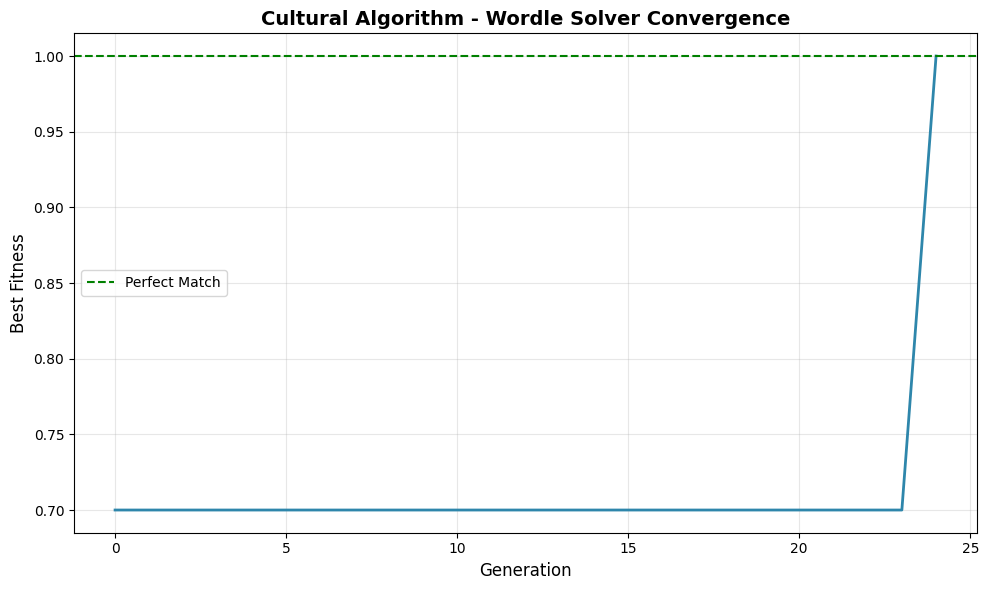


SUMMARY
Target: aloof
Found: aloof
Success: ✓ YES
Generations: 25
Final Fitness: 1.00


In [84]:
correct_word = "aloof"  
print("\n" + "="*60)
print("CULTURAL ALGORITHM WORDLE SOLVER - WORKING VERSION")
print("="*60 + "\n")

best_solution, history = cultural_algorithm_wordle(
    correct_word=correct_word,
    words=words,
    pop_size=50,
    acceptance_ratio=0.2,
    influence_ratio=0.3,
    max_generations=500  
)
plot_convergence(history)

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Target: {correct_word}")
print(f"Found: {best_solution}")
print(f"Success: {'✓ YES' if best_solution == correct_word else '✗ NO'}")
print(f"Generations: {len(history)}")
print(f"Final Fitness: {history[-1]:.2f}")